In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv("../data/train.csv")

In [4]:
# Count missing values and calculate percentage
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
print(pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Percent']))

                           Total  Percent
RhythmScore                    0      0.0
AudioLoudness                  0      0.0
VocalContent                   0      0.0
AcousticQuality                0      0.0
InstrumentalScore              0      0.0
LivePerformanceLikelihood      0      0.0
MoodScore                      0      0.0
TrackDurationMs                0      0.0
Energy                         0      0.0
BeatsPerMinute                 0      0.0


In [5]:
print(f"Duplicate rows found: {df.duplicated().sum()}")
# df.drop_duplicates(inplace=True) # Optional: Remove them

Duplicate rows found: 0


In [6]:
print(df.dtypes)
# Convert if necessary: df['date_column'] = pd.to_datetime(df['date_column'])

RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object


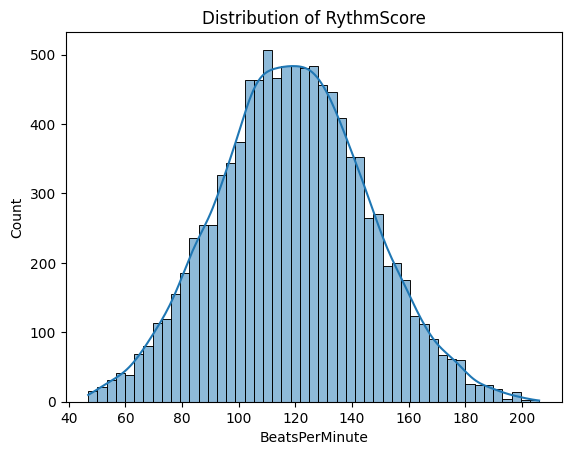

In [20]:
# Plotting a histogram with a Kernel Density Estimate (KDE)
sns.histplot(df['BeatsPerMinute'], kde=True)
plt.title('Distribution of RythmScore')
plt.show()

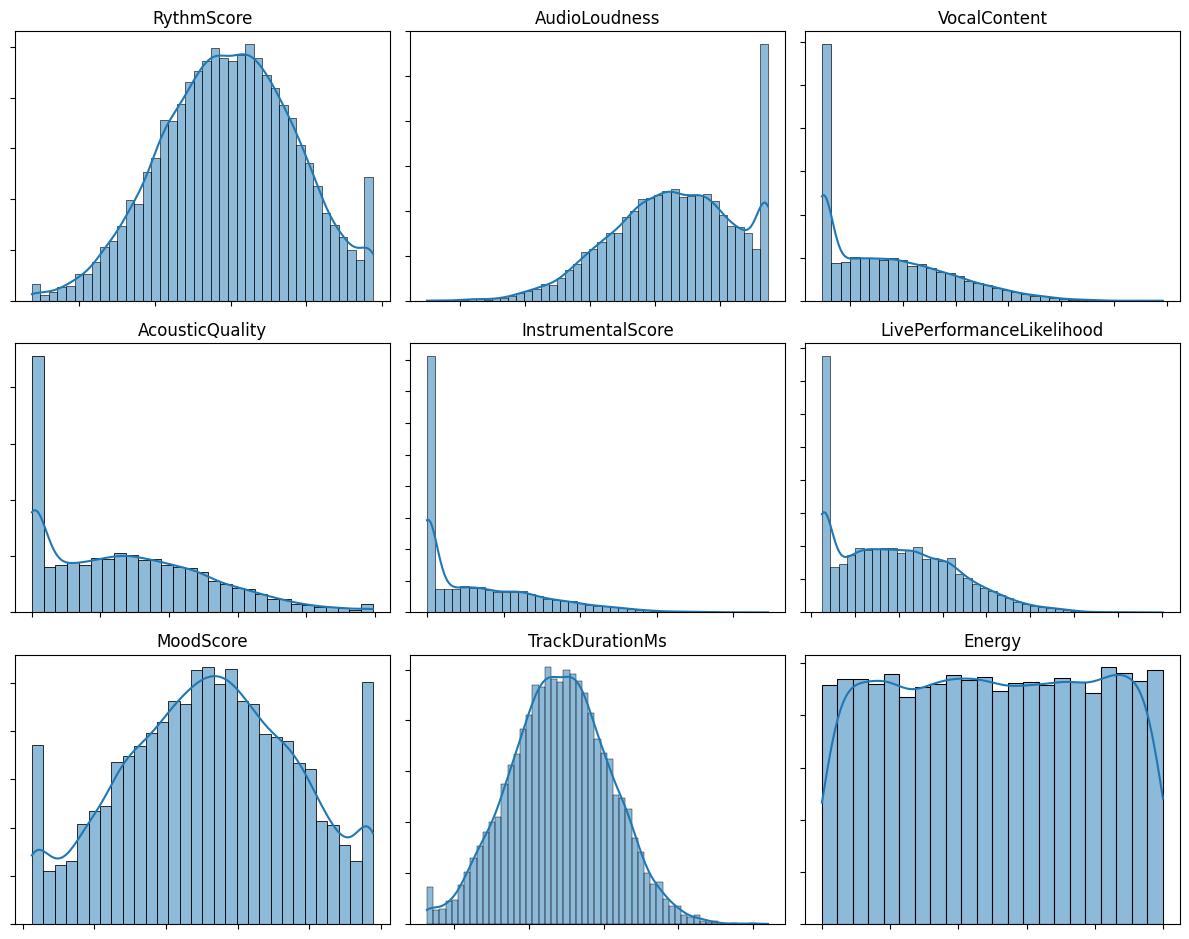

In [8]:


# Dictionary mapping column names to display titles
columns_dict = {
    'RhythmScore': 'RythmScore',
    'AudioLoudness': 'AudioLoudness',
    'VocalContent': 'VocalContent',
    'AcousticQuality': 'AcousticQuality',
    'InstrumentalScore': 'InstrumentalScore',
    'LivePerformanceLikelihood': 'LivePerformanceLikelihood',
    'MoodScore': 'MoodScore',
    'TrackDurationMs': 'TrackDurationMs',
    'Energy': 'Energy'
}

# Setup figure
n_cols = 3
n_rows = len(columns_dict) // n_cols + (len(columns_dict) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

# Flatten axes array
axes_flat = axes.flatten()

for idx, (col_name, title) in enumerate(columns_dict.items()):
    ax = axes_flat[idx]
    sns.histplot(df[col_name], kde=True, ax=ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)

# Hide any unused subplots
for idx in range(len(columns_dict), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout with top padding
plt.show()

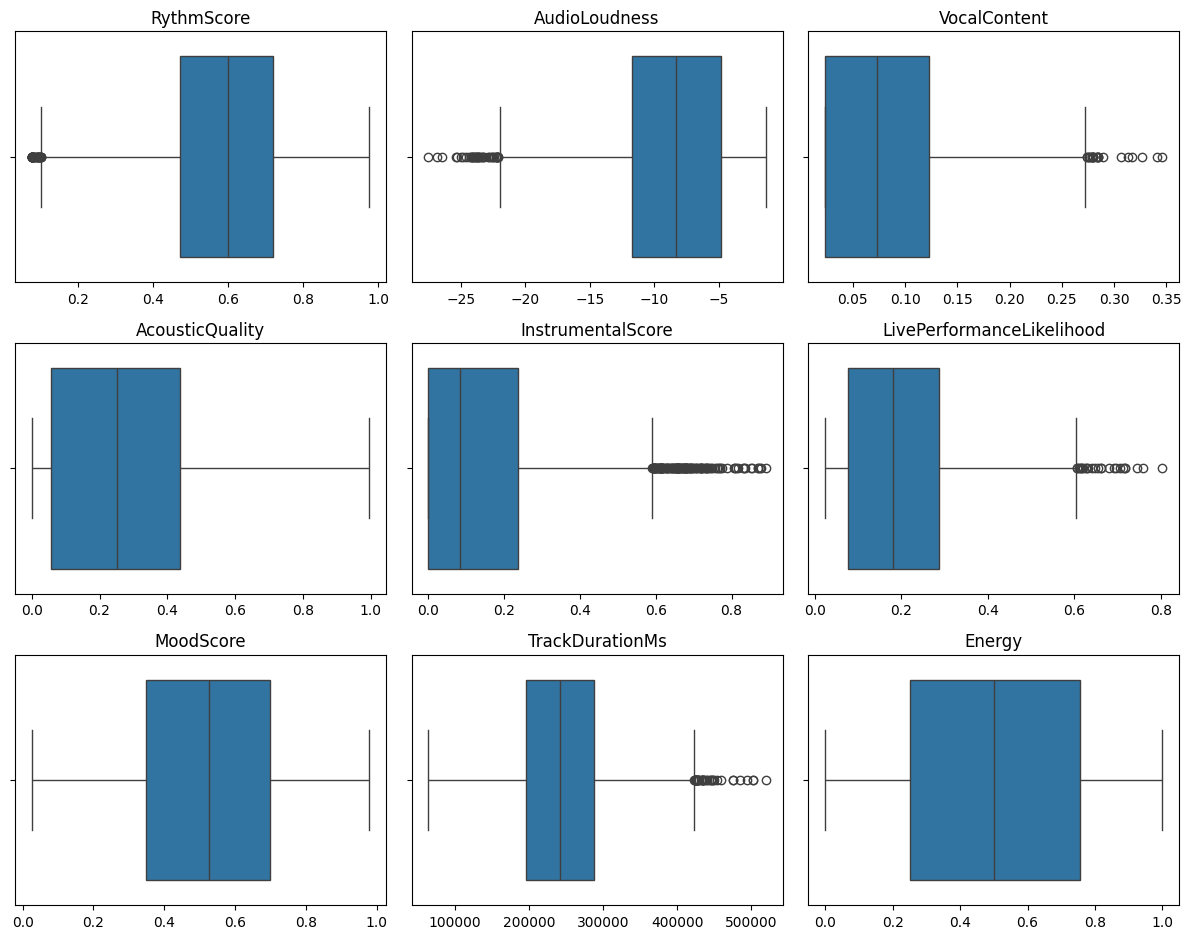

In [19]:

# Dictionary mapping column names to display titles
columns_dict = {
    'RhythmScore': 'RythmScore',
    'AudioLoudness': 'AudioLoudness',
    'VocalContent': 'VocalContent',
    'AcousticQuality': 'AcousticQuality',
    'InstrumentalScore': 'InstrumentalScore',
    'LivePerformanceLikelihood': 'LivePerformanceLikelihood',
    'MoodScore': 'MoodScore',
    'TrackDurationMs': 'TrackDurationMs',
    'Energy': 'Energy'
}

# Setup figure
n_cols = 3
n_rows = len(columns_dict) // n_cols + (len(columns_dict) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

# Flatten axes array
axes_flat = axes.flatten()

for idx, (col_name, title) in enumerate(columns_dict.items()):
    ax = axes_flat[idx]
    sns.boxplot(x=df[col_name], ax=ax)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)

# Hide any unused subplots
for idx in range(len(columns_dict), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout with top padding
plt.show()

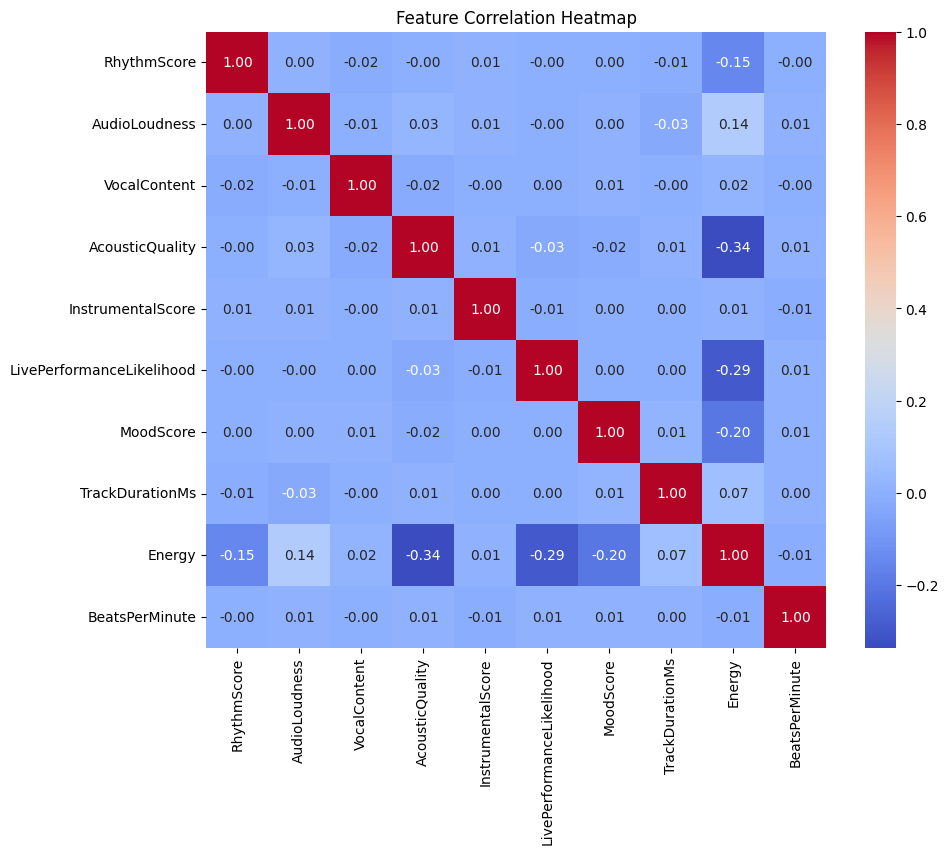

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Find columns with only one unique value
single_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f"Columns to drop: {single_value_cols}")

Columns to drop: []


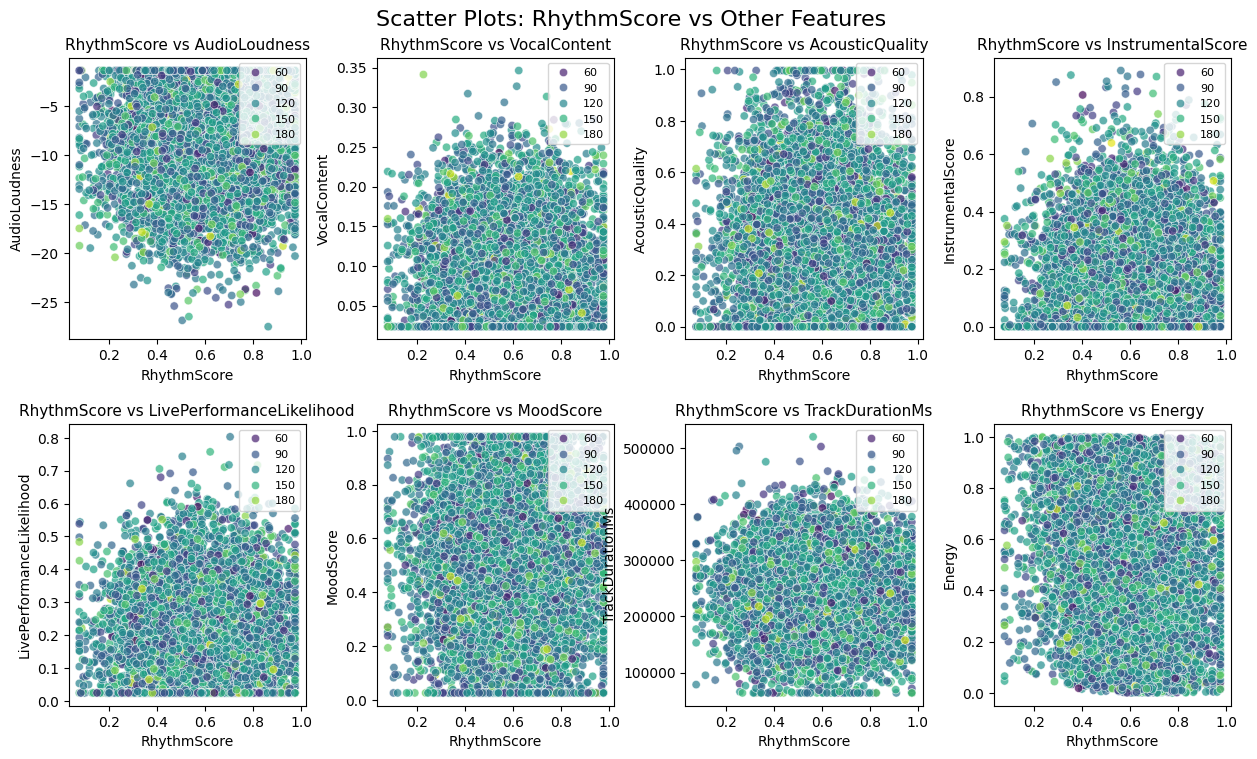

In [12]:

# Define the fixed feature and target column
fixed_feature = 'RhythmScore'  # Change this to your desired fixed feature
target_column = 'BeatsPerMinute'  # Change to your actual target column name

# List of features to plot against the fixed feature
features_to_plot = ['AudioLoudness', 'VocalContent', 'AcousticQuality',
                    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
                    'TrackDurationMs', 'Energy']

# Create 3x3 grid
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

for i, feature in enumerate(features_to_plot):
    if i < len(axes):  # Safety check
        ax = axes[i]
        sns.scatterplot(x=fixed_feature, y=feature, hue=target_column, 
                       data=df, ax=ax, alpha=0.7, palette='viridis')
        ax.set_title(f'{fixed_feature} vs {feature}', fontsize=11)
        ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for i in range(len(features_to_plot), len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Scatter Plots: {fixed_feature} vs Other Features', fontsize=16, y=0.98)
plt.show()

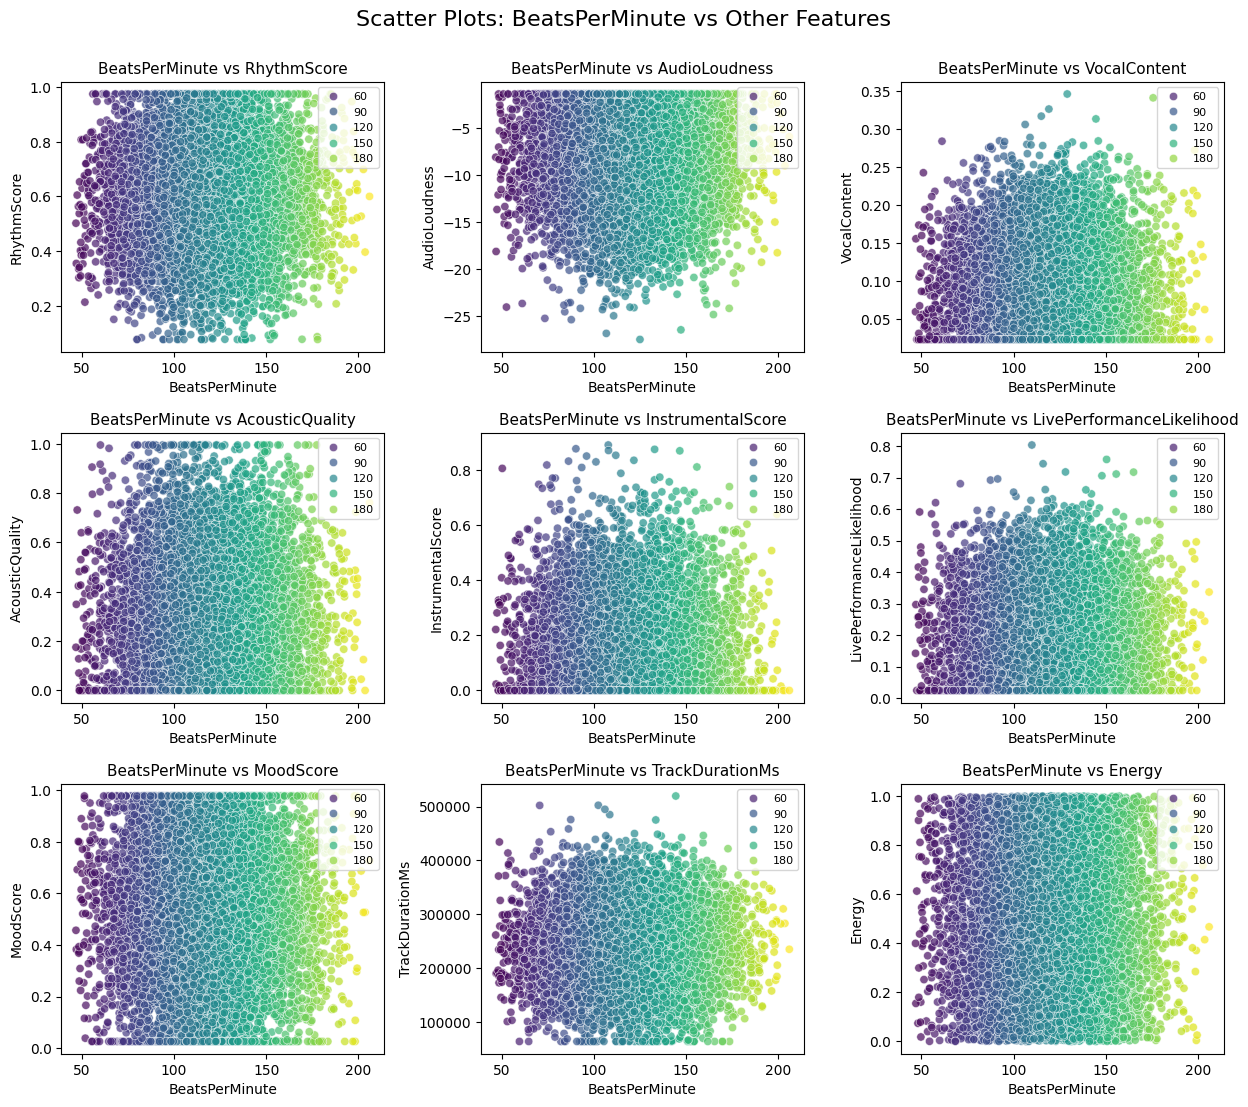

In [13]:

# Define the fixed feature and target column
fixed_feature = 'BeatsPerMinute'  # Change this to your desired fixed feature
#target_column = 'BeatsPerMinute'  # Change to your actual target column name

# List of features to plot against the fixed feature
features_to_plot = ['RhythmScore','AudioLoudness', 'VocalContent', 'AcousticQuality',
                    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
                    'TrackDurationMs', 'Energy']

# Create 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

for i, feature in enumerate(features_to_plot):
    if i < len(axes):  # Safety check
        ax = axes[i]
        sns.scatterplot(x=fixed_feature, y=feature, hue=target_column, 
                       data=df, ax=ax, alpha=0.7, palette='viridis')
        ax.set_title(f'{fixed_feature} vs {feature}', fontsize=11)
        ax.legend(loc='upper right', fontsize=8)

# Hide any unused subplots
for i in range(len(features_to_plot), len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Scatter Plots: {fixed_feature} vs Other Features', fontsize=16, y=0.98)
plt.show()

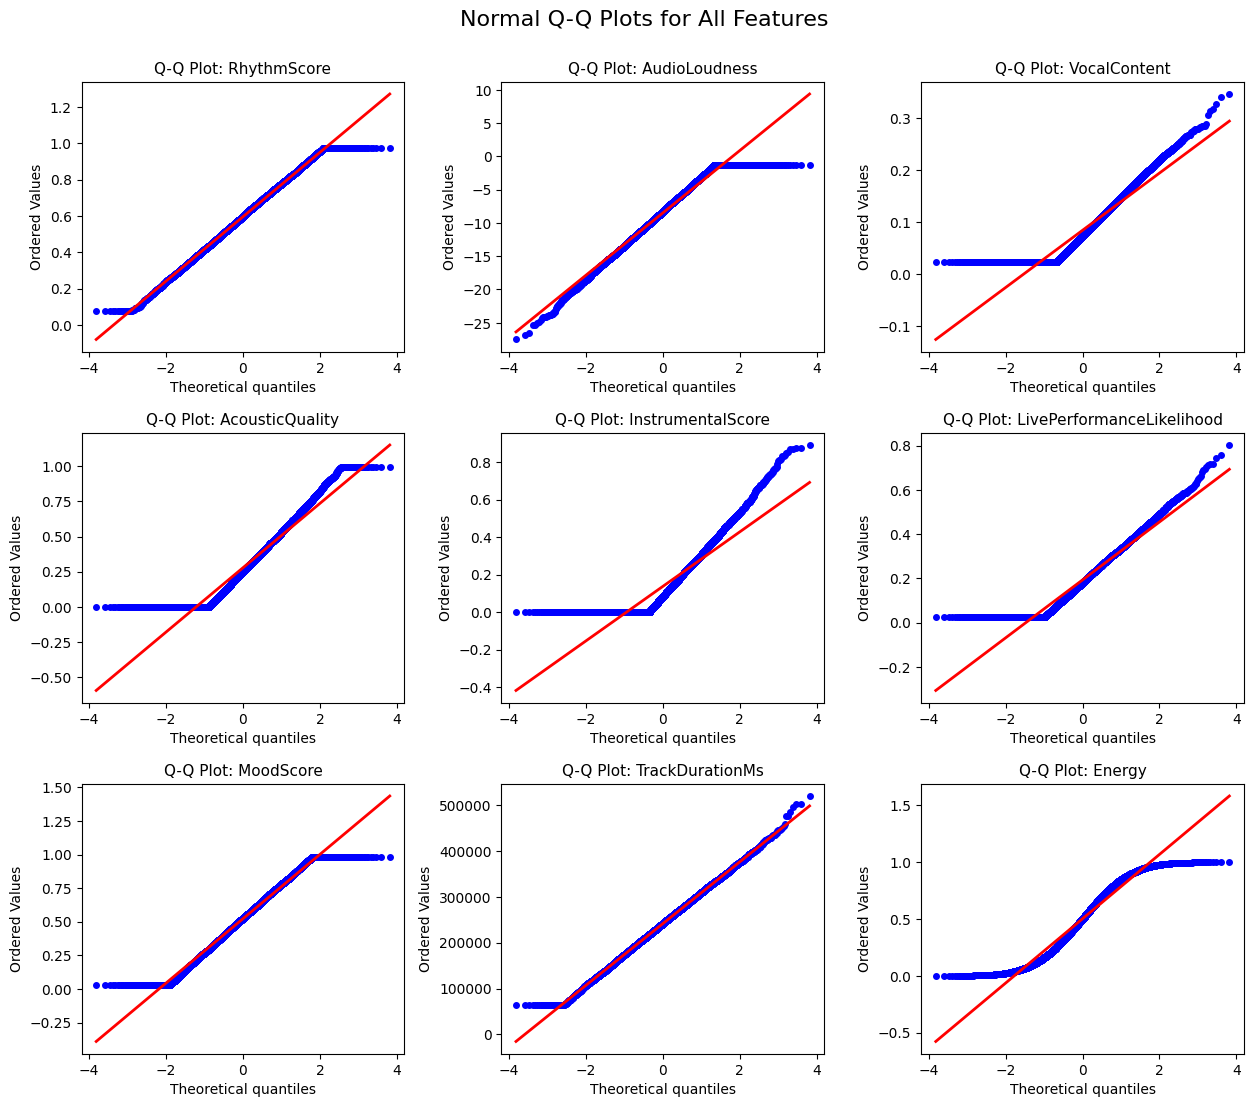

In [14]:

# List of features to analyze
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 
            'AcousticQuality', 'InstrumentalScore', 'LivePerformanceLikelihood',
            'MoodScore', 'TrackDurationMs', 'Energy']

# Create 3x3 grid for Q-Q plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)

for i, feature in enumerate(features):
    if i < len(axes):
        ax = axes[i]
        stats.probplot(df[feature], dist="norm", plot=ax)
        ax.set_title(f'Q-Q Plot: {feature}', fontsize=11)
        # Customize line appearance
        ax.get_lines()[0].set_markerfacecolor('blue')
        ax.get_lines()[0].set_markeredgecolor('blue')
        ax.get_lines()[0].set_markersize(4)
        ax.get_lines()[1].set_color('red')
        ax.get_lines()[1].set_linewidth(2)

# Hide any unused subplots
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.suptitle('Normal Q-Q Plots for All Features', fontsize=16, y=0.98)
plt.show()

Advanced Analysis

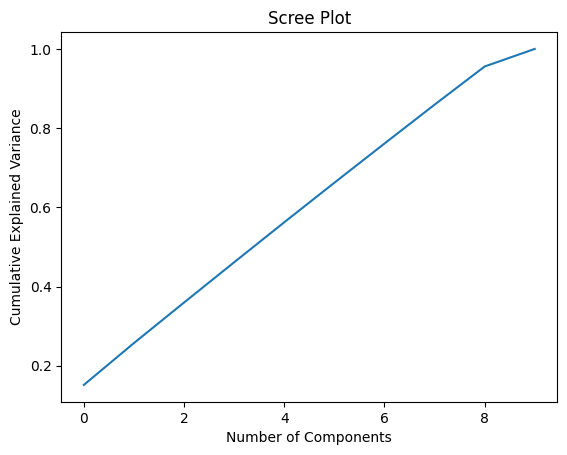

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Scale the data (Mean=0, Var=1)
features = df.select_dtypes(include=['float64', 'int64'])
scaled_data = StandardScaler().fit_transform(features)

# 2. Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# 3. Check Explained Variance
import numpy as np
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

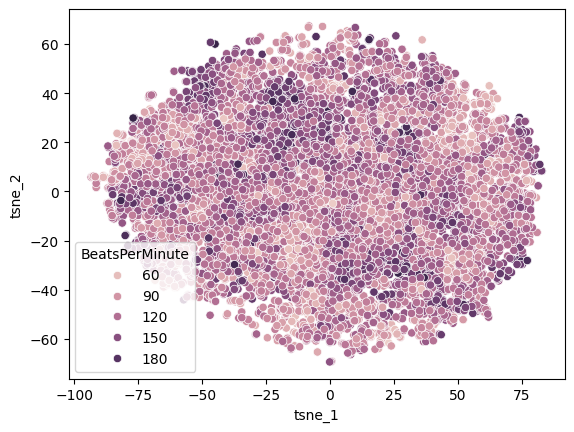

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

df['tsne_1'] = tsne_results[:,0]
df['tsne_2'] = tsne_results[:,1]

sns.scatterplot(x='tsne_1', y='tsne_2', hue='BeatsPerMinute', data=df)
plt.show()

VIF Data:
                     feature        VIF
7            TrackDurationMs  11.582937
0                RhythmScore   8.932831
6                  MoodScore   5.049739
8                     Energy   3.950090
1              AudioLoudness   3.878340
5  LivePerformanceLikelihood   2.984273
2               VocalContent   2.982596
3            AcousticQuality   2.418060
4          InstrumentalScore   1.722436
Correlation of Energy*AudioLoudness with BeatsPerMinute: 0.0113


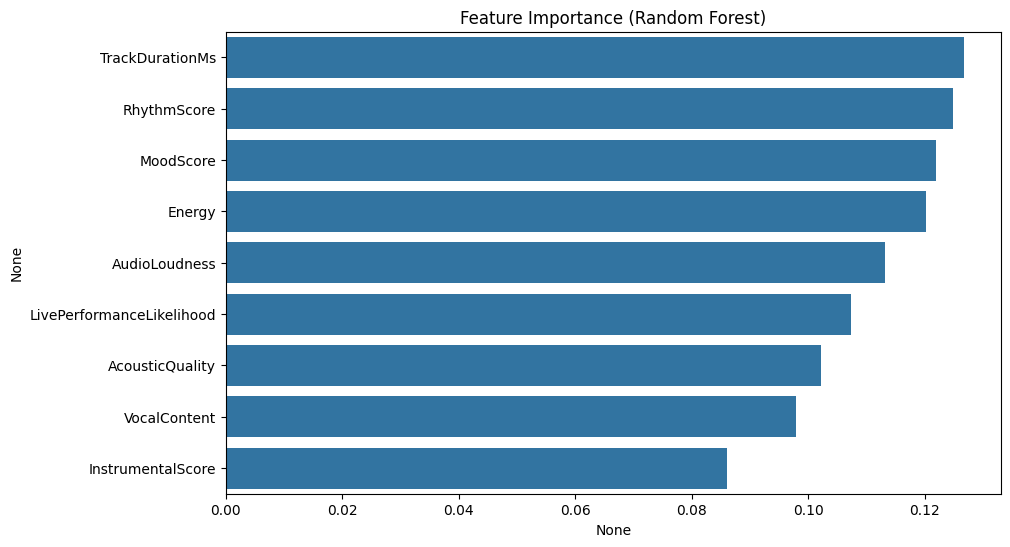

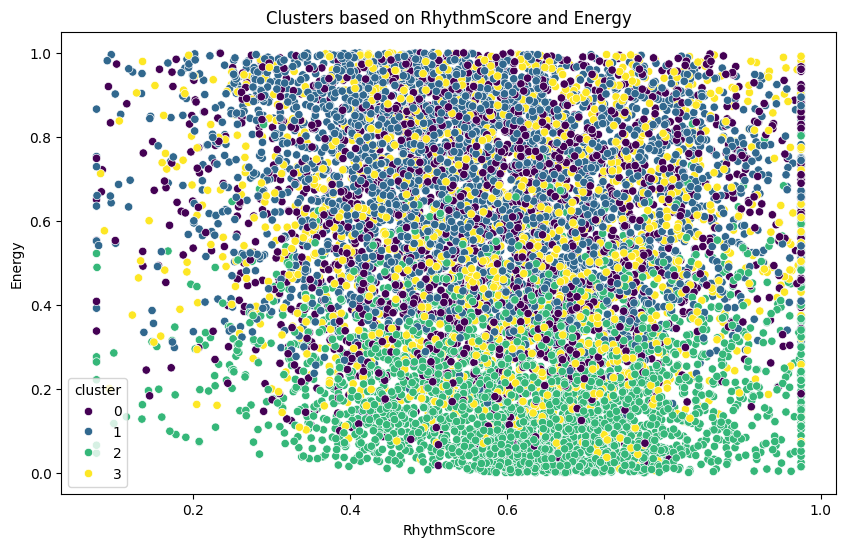

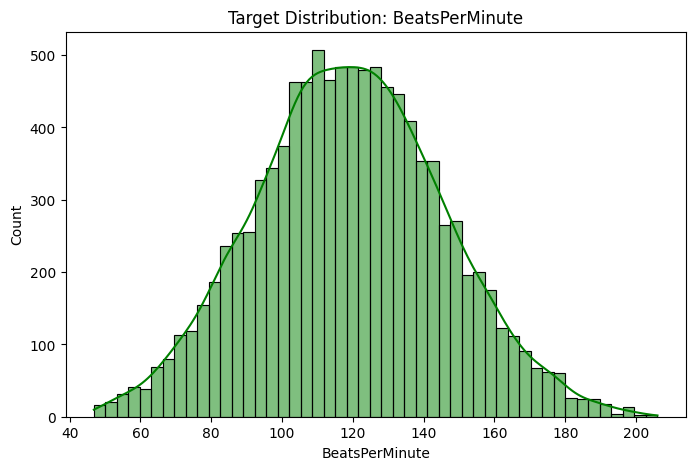

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 1. Calculate VIF
X = df.drop(columns=['BeatsPerMinute'])
if 'tsne_1' in X.columns: X = X.drop(columns=['tsne_1', 'tsne_2']) # remove added columns if any

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("VIF Data:")
print(vif_data.sort_values(by="VIF", ascending=False))

# 2. Feature Importance (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, df['BeatsPerMinute'])
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.savefig("feature_importance.png")

# 3. K-Means Clustering to find "Natural Groups"
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RhythmScore', y='Energy', hue='cluster', palette='viridis')
plt.title("Clusters based on RhythmScore and Energy")
plt.savefig("clusters_rhythm_energy.png")

# 4. Investigate Interaction: Energy * AudioLoudness
df['Energy_Loudness'] = df['Energy'] * df['AudioLoudness']
corr_new = df[['Energy_Loudness', 'BeatsPerMinute']].corr().iloc[0, 1]
print(f"Correlation of Energy*AudioLoudness with BeatsPerMinute: {corr_new:.4f}")

# Target Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['BeatsPerMinute'], kde=True, color='green')
plt.title("Target Distribution: BeatsPerMinute")


C:\Users\user\AppData\Local\Temp\ipykernel_17804\921423199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series, y=mi_series.index, palette='magma')


Unique values in BeatsPerMinute: 10243
Top 10 most frequent BeatsPerMinute values:
 BeatsPerMinute
109.310765    1
102.371876    1
110.470717    1
121.769858    1
84.638111     1
127.885779    1
137.249657    1
137.242701    1
133.008392    1
111.092828    1
Name: count, dtype: int64


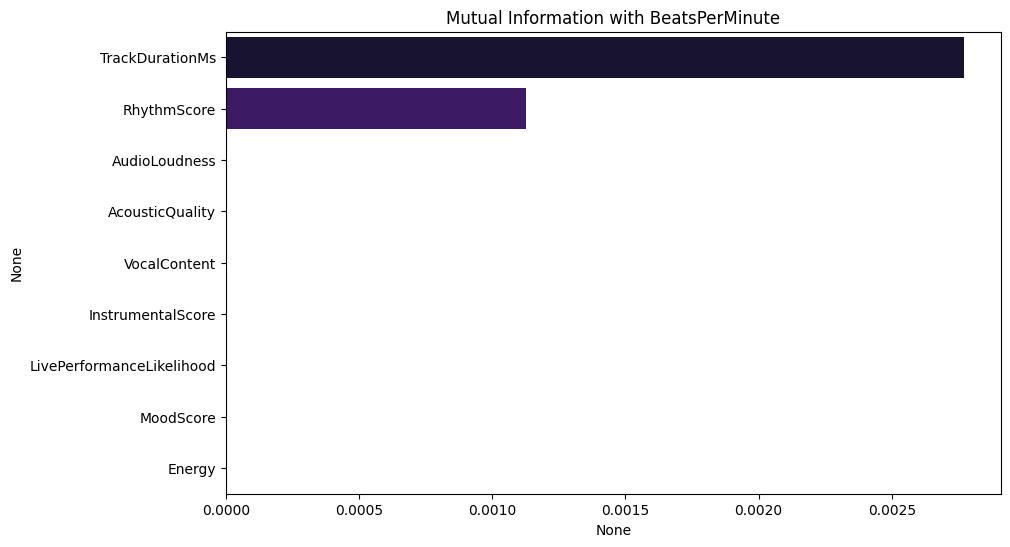

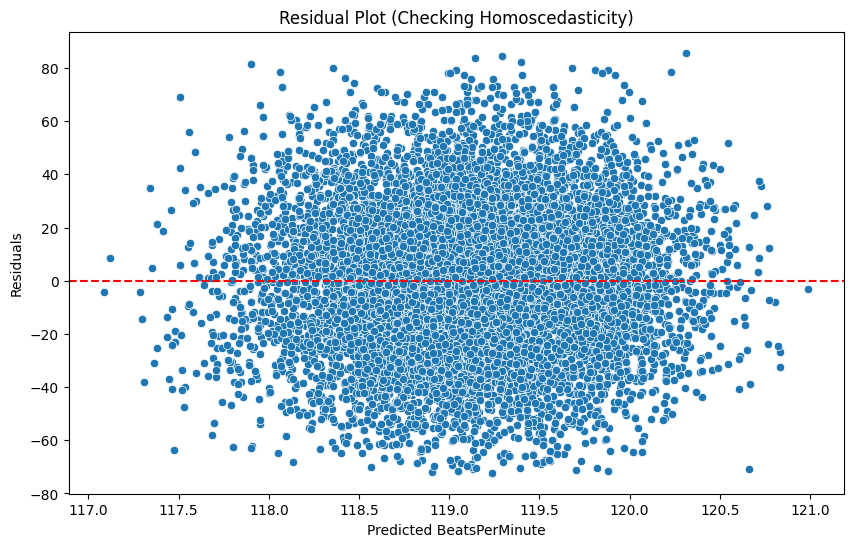

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# 5. Mutual Information
mi = mutual_info_regression(X, df['BeatsPerMinute'])
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series, y=mi_series.index, palette='magma')
plt.title("Mutual Information with BeatsPerMinute")


# 6. Residual Plot (Checking for Homoscedasticity)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, df['BeatsPerMinute'])
preds = lr.predict(X)
residuals = df['BeatsPerMinute'] - preds

plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted BeatsPerMinute")
plt.ylabel("Residuals")
plt.title("Residual Plot (Checking Homoscedasticity)")

# Checking if BeatsPerMinute has any weird artifacts (e.g. rounding)
print("Unique values in BeatsPerMinute:", df['BeatsPerMinute'].nunique())
print("Top 10 most frequent BeatsPerMinute values:\n", df['BeatsPerMinute'].value_counts().head(10))